In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [3]:
def run_randomForest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ',accuracy_score(y_test, y_pred))


In [4]:
data = pd.read_csv("C:/Users/User10/Desktop/final year/fyp/dataset/bankruptcyTrainSelected.csv")

In [5]:
data.head()

,Attr16,Attr24,Attr25,Attr27,Attr34,Attr39,Attr46,Attr54,Attr55,Attr56,Attr58,Attr60,class
0,-0.242796,-0.004522,0.050225,-0.009990,-0.144382,-0.016173,0.147450,-0.018113,-0.110578,0.014367,-0.014143,0.068399,0
1,-0.603332,0.048932,0.274101,-0.010933,1.228971,-0.052642,-0.013532,-0.014462,-0.114919,0.008492,-0.008666,-0.033498,0
2,-0.367159,0.030648,-0.114349,-0.009932,0.059970,0.068469,-0.234744,-0.019637,-0.123266,0.010819,-0.009437,-0.043455,0
3,-0.454498,-0.038157,-0.105949,-0.009921,-0.643082,0.071021,-0.067912,-0.019978,-0.077078,0.010683,-0.010840,-0.042828,0
4,0.744187,0.107718,-0.127631,-0.009057,0.891985,0.076296,0.049879,-0.010739,-0.076644,0.010970,-0.011056,-0.035892,0


In [6]:
x = data.iloc[:,0:12]
x.shape

(10000, 12)

In [7]:
x.head()

,Attr16,Attr24,Attr25,Attr27,Attr34,Attr39,Attr46,Attr54,Attr55,Attr56,Attr58,Attr60
0,-0.242796,-0.004522,0.050225,-0.009990,-0.144382,-0.016173,0.147450,-0.018113,-0.110578,0.014367,-0.014143,0.068399
1,-0.603332,0.048932,0.274101,-0.010933,1.228971,-0.052642,-0.013532,-0.014462,-0.114919,0.008492,-0.008666,-0.033498
2,-0.367159,0.030648,-0.114349,-0.009932,0.059970,0.068469,-0.234744,-0.019637,-0.123266,0.010819,-0.009437,-0.043455
3,-0.454498,-0.038157,-0.105949,-0.009921,-0.643082,0.071021,-0.067912,-0.019978,-0.077078,0.010683,-0.010840,-0.042828
4,0.744187,0.107718,-0.127631,-0.009057,0.891985,0.076296,0.049879,-0.010739,-0.076644,0.010970,-0.011056,-0.035892


In [8]:
y = data.iloc[:,12:13]
y.shape

(10000, 1)

In [9]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000, 1), (2000, 1))

In [11]:
model = RandomForestClassifier(n_estimators= 100)
model.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [12]:
model.score(x_test,y_test)

0.975

In [13]:
y_predicted = model.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1948,    0],
       [  50,    2]], dtype=int64)

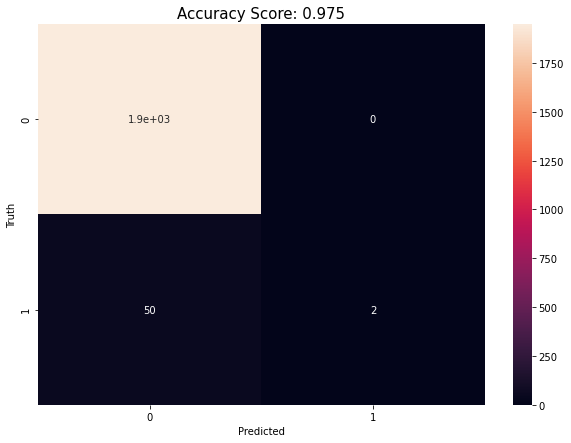

In [15]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y_test, y_predicted))
plt.title(all_sample_title, size = 15);

In [16]:
y_predicted = model.predict_proba(x_test)

In [17]:
#### >> Let's predict

newData = [[-0.979606056,
            -0.192202087,
            -0.800840553,
            -0.010527156,
            0.660372746,
            -0.091648878,
            -0.302513672,
            -0.024110246,
            -0.156974547,
            0.007742581,
            -0.007769404,
            0.027978043]]

predictionResultProba = model.predict_proba(newData)
predictionResultProba

array([[0.26, 0.74]])

In [18]:

predictionResult = model.predict(newData)

if(predictionResult == 0):
    print("Prediction result = Did Not Bankrupt")
else:
    print("Prediction result = Bankrupt")


Prediction result = Bankrupt


In [19]:
notbnk = predictionResultProba[0][0]
bnk = predictionResultProba[0][1]

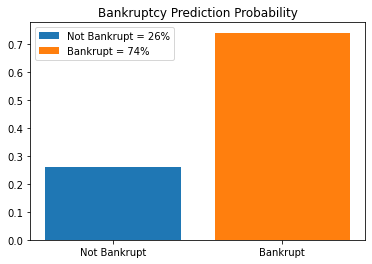

In [20]:
def visual():
    plt.bar('Not Bankrupt', notbnk)
    plt.bar('Bankrupt', bnk)
    plt.legend(['Not Bankrupt = ' "{:.0%}".format(notbnk),'Bankrupt = '"{:.0%}".format(bnk)])
    plt.title('Bankruptcy Prediction Probability')
    plt.show()
visual()

In [21]:
from joblib import dump, load
dump(model,'bankruptcyPredictionModel.joblib')

['bankruptcyPredictionModel.joblib']

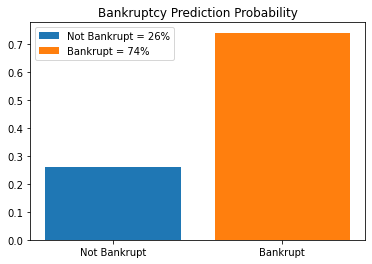

['visual.joblib']

In [22]:
from joblib import dump, load
dump(visual(),'visual.joblib')

In [23]:
import ctypes
print (ctypes.sizeof(ctypes.c_voidp))

8
